<a href="https://colab.research.google.com/github/sainathnallagonda/Aerofit-Case-Study/blob/main/Aerofit_Case_Study(Sainath_Nallagonda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

*   Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
*   For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.



Importing all packages

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df =pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [195]:
df.shape

(180, 9)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [197]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [198]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


There are no missing values in these data

**Univariate Analysis**

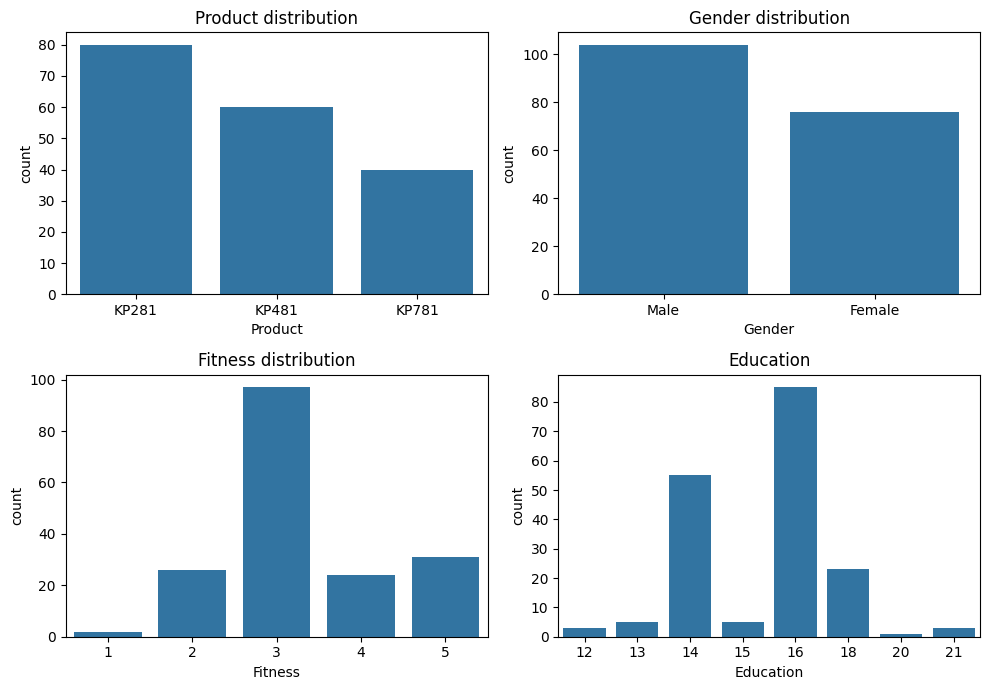

In [199]:
plt.subplots(2,2, figsize=(10, 7))
plt.subplot(2,2,1)
plt.title('Product distribution')
sns.countplot(data=df, x='Product')

plt.subplot(2,2,2)
plt.title('Gender distribution')
sns.countplot(data=df, x='Gender')


plt.subplot(2,2,3)
plt.title('Fitness distribution')
sns.countplot(data=df, x='Fitness')

plt.subplot(2,2,4)
plt.title('Education')
sns.countplot(data=df, x='Education')


plt.tight_layout()
plt.show()

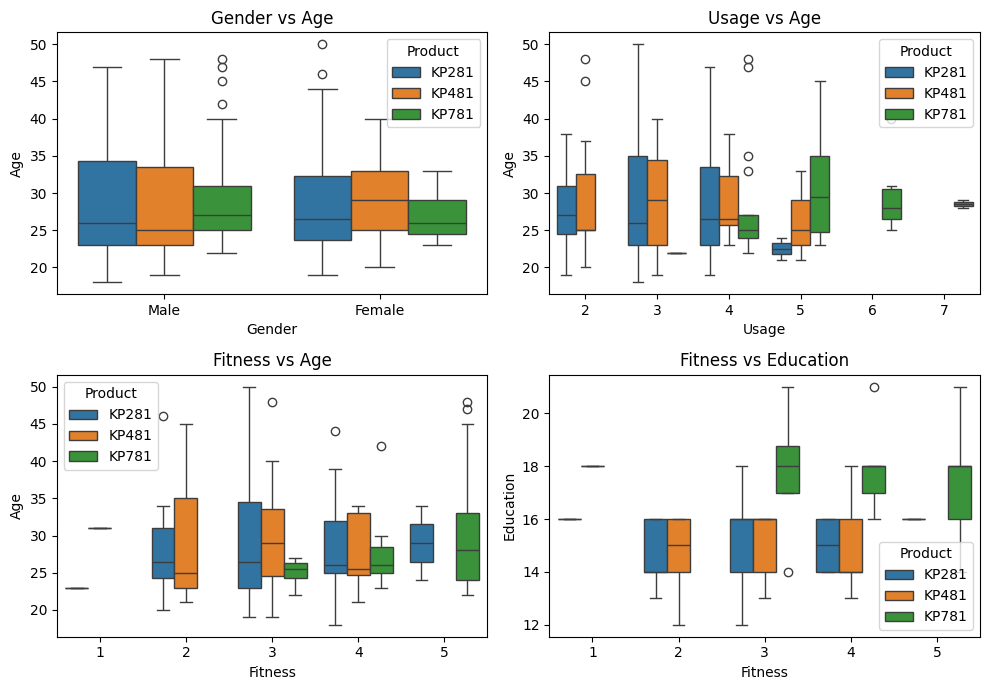

In [200]:
plt.subplots(2,2, figsize=(10, 7))
plt.subplot(2,2,1)
plt.title('Gender vs Age')
sns.boxplot(data=df, x='Gender', y='Age',hue='Product')

plt.subplot(2,2,2)
plt.title('Usage vs Age')
sns.boxplot(data = df, x='Usage',y='Age' ,hue='Product')


plt.subplot(2,2,3)
plt.title('Fitness vs Age')
sns.boxplot(data = df, x='Fitness',y= 'Age' ,hue='Product')

plt.subplot(2,2,4)
plt.title('Fitness vs Education')
sns.boxplot(data = df, x='Fitness',y='Education' ,hue='Product')


plt.tight_layout()
plt.show()

In [201]:
probability_of_opting_KP281 = round((df[df['Product'] == 'KP281'].count()['Product']/df['Product'].value_counts().sum()),2)
probability_of_opting_KP481 = round((df[df['Product'] == 'KP481'].count()['Product']/df['Product'].value_counts().sum()),2)
probability_of_opting_KP781 = round((df[df['Product'] == 'KP781'].count()['Product']/df['Product'].value_counts().sum()),2)
probability_of_opting_KP281,probability_of_opting_KP481,probability_of_opting_KP781

(0.44, 0.33, 0.22)

probability of opting KP281 is 0.44

probability of opting KP481 is 0.33

probability of opting KP781 is 0.22




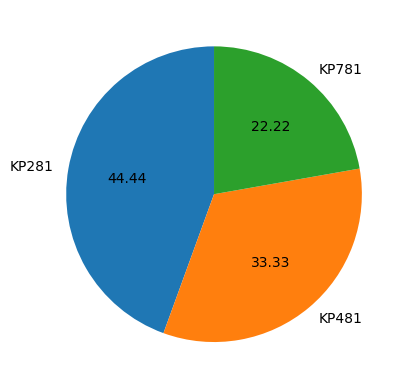

In [202]:
product_percent = df['Product'].value_counts().reset_index()
plt.pie(x=product_percent['count'], labels=product_percent['Product'], startangle= 90, autopct='%.2f')
plt.show()

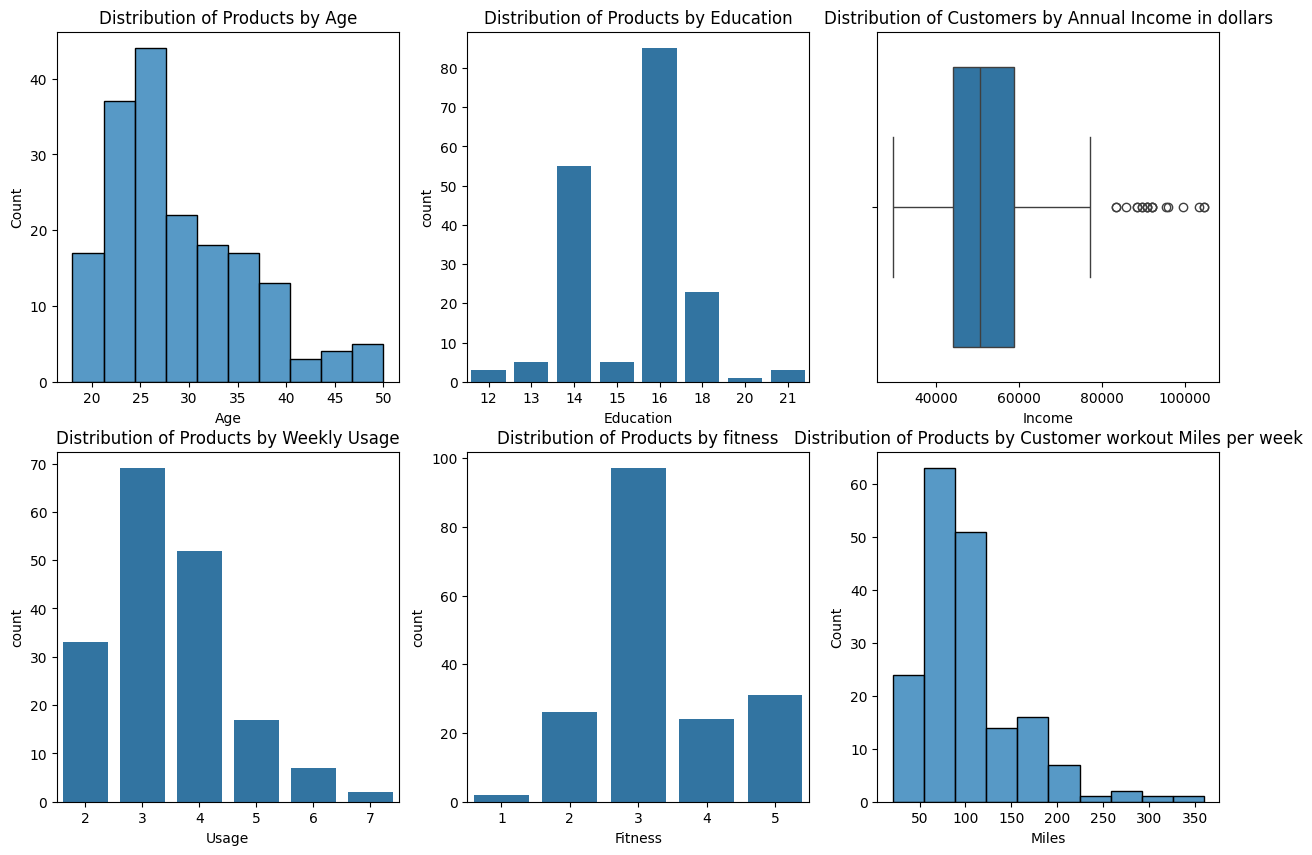

In [203]:
fig, ax=plt.subplots(2,3,figsize=(15,10))  #Distribution of products by age
sns.histplot(ax=ax[0,0],data=df['Age'],bins=10)
ax[0,0].set_title('Distribution of Products by Age')
#plt.title('Distribution of Products by Age',ax=ax[0,0])

sns.countplot(ax=ax[0,1],data=df,x=df['Education'])
ax[0,1].set_title('Distribution of Products by Education')


sns.boxplot(ax=ax[0,2],x=df['Income'])
ax[0,2].set_title('Distribution of Customers by Annual Income in dollars')

sns.countplot(ax=ax[1,0],data=df,x=df['Usage'])
ax[1,0].set_title('Distribution of Products by Weekly Usage')

sns.countplot(ax=ax[1,1],data=df,x=df['Fitness'])
ax[1,1].set_title('Distribution of Products by fitness')

sns.histplot(ax=ax[1,2],data=df['Miles'],bins=10)
ax[1,2].set_title('Distribution of Products by Customer workout Miles per week')
plt.show()

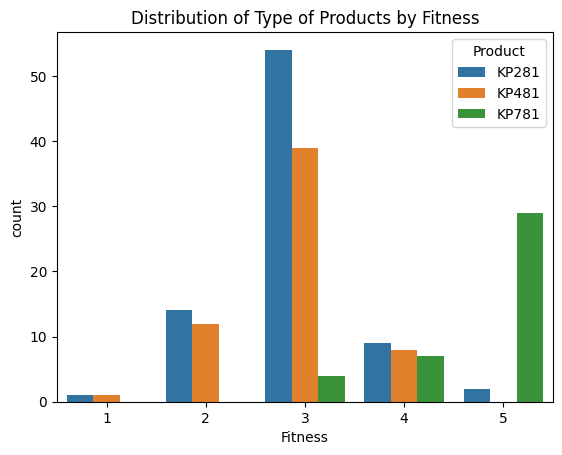

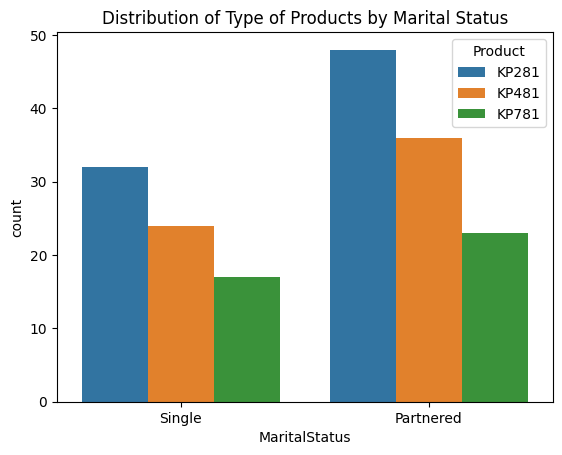

In [204]:
sns.countplot(data=df,x='Fitness',hue='Product')
plt.title('Distribution of Type of Products by Fitness')
plt.show()
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.title('Distribution of Type of Products by Marital Status')
plt.show()

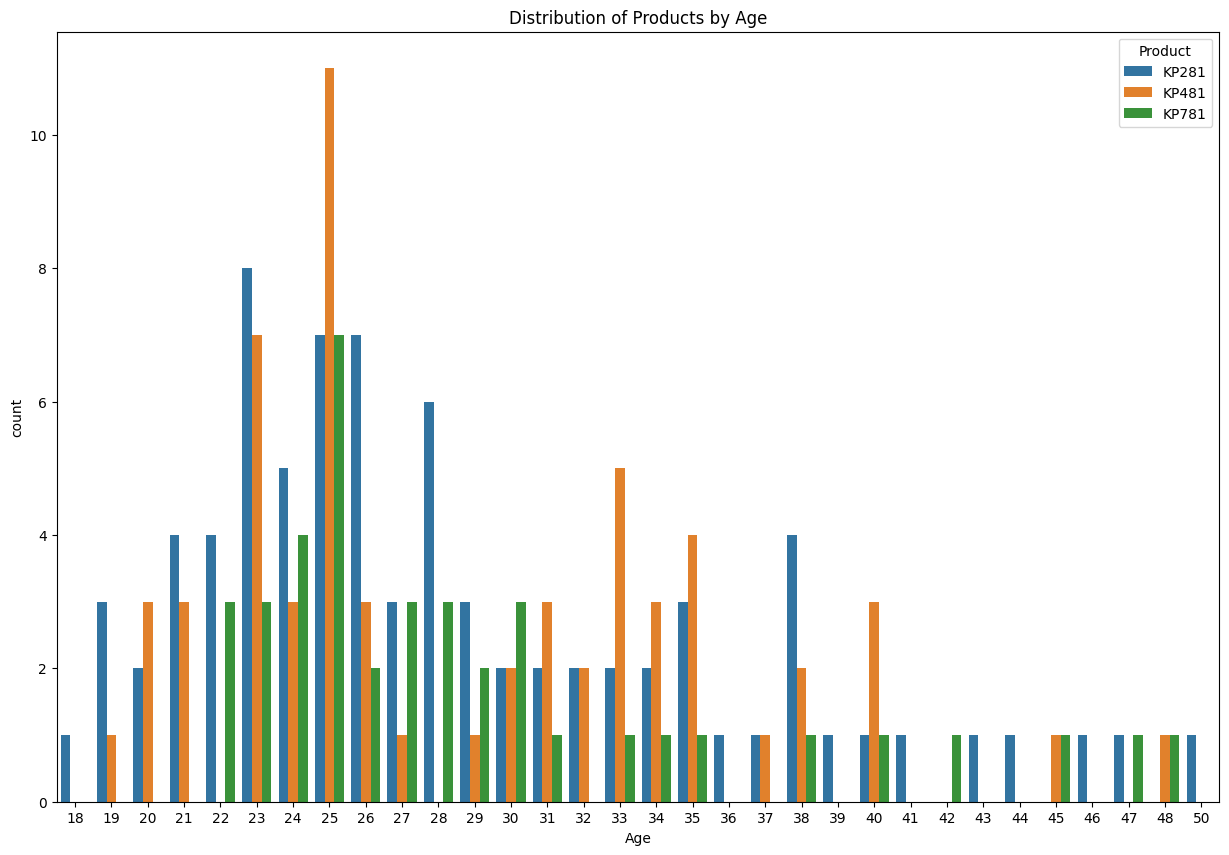

In [205]:
plt.figure(figsize=(15,10))
sns.countplot(data=df[['Age','Product']], x=df['Age'],hue='Product')
plt.title('Distribution of Products by Age')
plt.show()

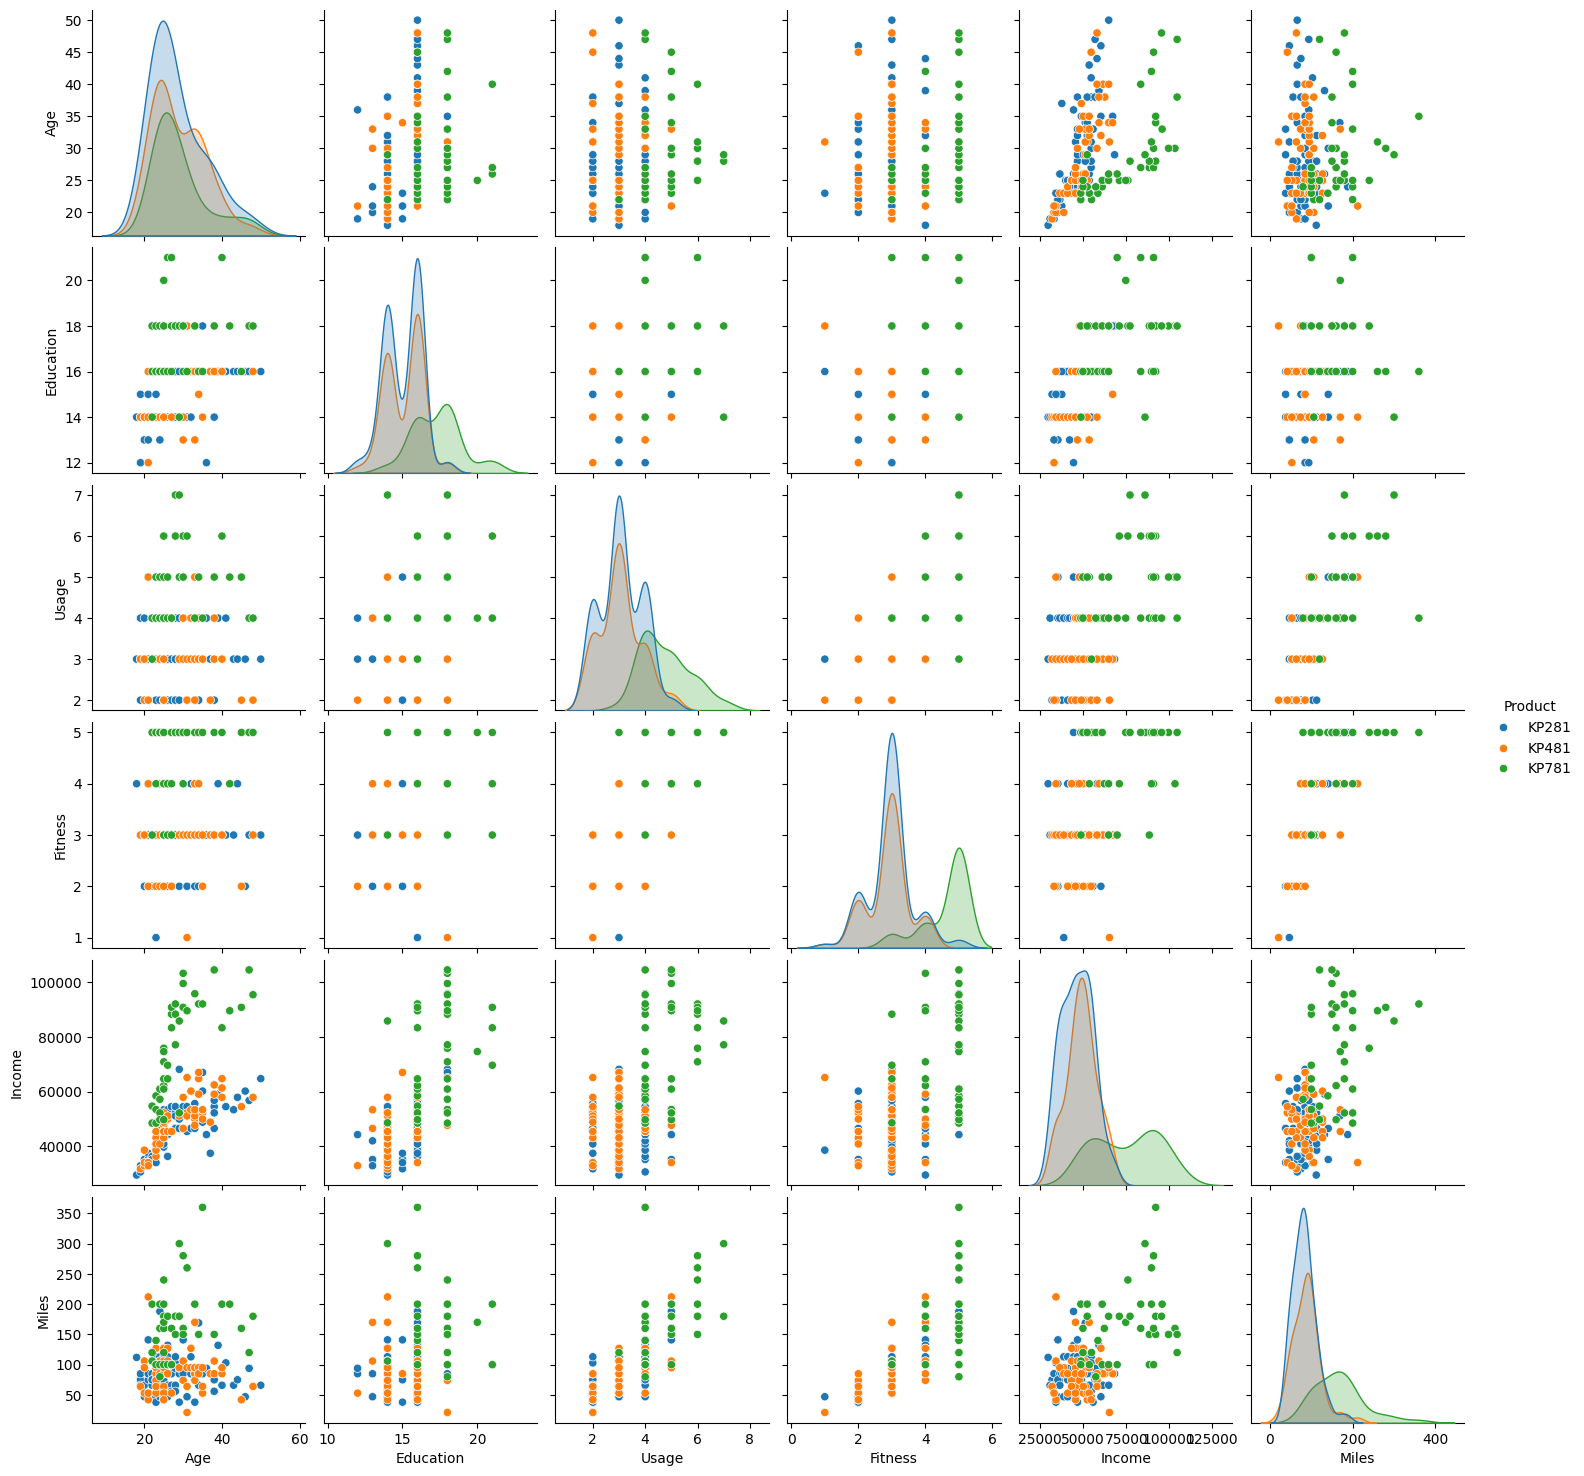

In [206]:
sns.pairplot(data=df,hue='Product')
plt.show()

In [207]:
ct1=pd.crosstab(df['Gender'],df['Product'],margins=True,margins_name='Total')
ct1

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


In [208]:
pd.crosstab(df['Gender'],df['Product'],margins=True,normalize=1)


Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


In [209]:
pd.crosstab(df['Gender'],df['Product'],margins=True,normalize=0)


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


Marginal probability of a customer buying KP281,KP481,KP781 are 0.44,0.33,0.22 respectivly

Marginal probability of a male customer buying KP281,KP481,KP781 are 0.38,0.29,0.31 respectivly

Marginal probability of a female customer buying KP281,KP481,KP781 are 0.52,0.38,0.09 respectivly

Here Customers are more willing to buy the base product based on their income,fitness levels i.e KP281 as it has more probability.

Among males and females, males are more interested to buy the higher end treadmill model KP781

Conditional Probabilities of KP281,KP481,KP781 given that customer is female are 0.53,0.38,0.09 and customer is male are 0.28, 0.3, 0.32

**Joint probabilty**

In [210]:
ct1


Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


In [ ]:
KP281_and_Female_prob=round(ct1.iloc[0,0]/ct1.Total[2],2)
KP481_and_Female_prob=round(ct1.KP481[0]/ct1.Total[2],2)
KP781_and_Female_prob=round(ct1.KP781[0]/ct1.Total[2],2)

In [212]:
print(f"Joint probabilities of customer being the female wrt the product being KP281,KP481,KP781 are:{KP281_and_Female_prob},{KP481_and_Female_prob},{KP781_and_Female_prob}")

Joint probabilities of customer being the female wrt the product being KP281,KP481,KP781 are:0.22,0.16,0.04


In [ ]:
KP281_and_male_prob=round(ct1.iloc[0,0]/ct1.Total[2],2)
KP481_and_male_prob=round(ct1.KP481[1]/ct1.Total[2],2)
KP781_and_male_prob=round(ct1.KP781[1]/ct1.Total[2],2)

In [214]:
print(f"Joint probabilities of customer being the male wrt the product being KP281,KP481,KP781 are: {KP281_and_male_prob},{KP481_and_male_prob},{KP781_and_male_prob}")

Joint probabilities of customer being the male wrt the product being KP281,KP481,KP781 are: 0.22,0.17,0.18


**Conditional Probabilities**

In [ ]:
prob_KP281_given_Female=round(ct1.iloc[0,0]/ct1.Total[0],2)
prob_KP481_given_Female=round(ct1.KP481[0]/ct1.Total[0],2)
prob_KP781_given_Female=round(ct1.KP781[0]/ct1.Total[0],2)

In [216]:
print(f"Conditional probabilities of customer being the female wrt the product being KP281,KP481,KP781 are:{prob_KP281_given_Female},{prob_KP481_given_Female},{prob_KP781_given_Female}")

Conditional probabilities of customer being the female wrt the product being KP281,KP481,KP781 are:0.53,0.38,0.09


In [ ]:
prob_KP281_given_male=round(ct1.iloc[0,1]/ct1.Total[1],2)
prob_KP481_given_male=round(ct1.KP481[1]/ct1.Total[1],2)
prob_KP781_given_male=round(ct1.KP781[1]/ct1.Total[1],2)


In [218]:
print(f"Conditional probabilities of customer being the male wrt the product being KP281,KP481,KP781 are:{prob_KP281_given_male},{prob_KP481_given_male},{prob_KP781_given_male}")

Conditional probabilities of customer being the male wrt the product being KP281,KP481,KP781 are:0.28,0.3,0.32


**Summary**

*   *Age* alone does not impact the sales of a product type.
*   The population who received 14 to 16 years of education owns `71%` of treadmills.
*   The population who owns the *KP781* plans to use their treadmill at least 4 times a week.
*   Income does have an impact on the choice of treadmill, although there is an overlap for the population who earns between 50k to 70k.
*   Miles are affected by how many times the owner plans to use the treadmill. Again, age does not show any significant impact.
*   Every product type holds an almost equal share of sales in the market.

**Bussiness Insights**

*   There is noticable gap in the price between *KP481* and *KP781*.
*   There are 15% fewer females. Businesses should understand through polls or surveys whether there are fewer females into fitness and running or if they are buying competitors' products. This will help in identifying specific features or price ranges. The same argument can be made for partnered and single people.
*   There is neither mention of bulk orders, for example, from a gym or fitness chain, nor government contracts.

**Recommendation**
*   Regarding KP481 & KP281, their is a strong mixed relationship between the customers who opted both.Because for most of the people who opted KP281 were having average fitness, usage, income. So, probably for the upcomminig customers we can highly recomend them to opt KP481 instead of KP281 so that it would increase the purchase cost of about 250$ per each customer.
*   We need to make sure that customer should feel that KP481 is more valuable compared to KP281 for their price they were being offered like the difference between Iphone 13 Mini and Iphone 13 mobiles.
*   Aerofit can implement the trade in feature of old product for the old customers and offer discount in new products. These feature will give hope for the customer to return in future.
*   Aerofit should concentrate Marketing products on different streams such as TV, youtube,newspapers where we can spread the word which will help the families to buy product as the treadmill can be used by whole family which is why customers will be more interested in it.


